In [1]:
import time
import numpy as np
import os
from keras import layers, models, callbacks, regularizers, optimizers
from keras.layers import advanced_activations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler as ms
import pandas as pd
import numpy as np
import numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import os
import glob
import datetime as dt

from datetime import timedelta
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit


/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pywt

In [4]:
df1 = pd.read_csv('filtered/alwyn_fam_1_filt_13.csv')
df2 = pd.read_csv('filtered/alwyn_non_1_filt_13.csv')
df3 = pd.read_csv('filtered/deepak_fam_1_filt_13.csv')
df4 = pd.read_csv('filtered/deepak_non_1_filt_13.csv')
df5 = pd.read_csv('filtered/murli_fam_2_filt_13.csv')
df6 = pd.read_csv('filtered/murli_non_1_filt_13.csv')
df7 = pd.read_csv('filtered/neeraj_fam_1_filt_13.csv')
df8 = pd.read_csv('filtered/neeraj_non_2_filt_13.csv')
df9 = pd.read_csv('filtered/nikhil_fam_1_filt_13.csv')
df10 = pd.read_csv('filtered/nikhil_non_1_filt_13.csv')
df11 = pd.read_csv('filtered/rahul_fam_1_filt_13.csv')
df12 = pd.read_csv('filtered/rahul_non_1_filt_13.csv')
df13 = pd.read_csv('filtered/rakesh_fam_1_filt_13.csv')
df14 = pd.read_csv('filtered/rakesh_non_1_filt_13.csv')
df15 = pd.read_csv('filtered/subham_fam_1_filt_13.csv')
df16 = pd.read_csv('filtered/subham_non_1_filt_13.csv')
df17 = pd.read_csv('filtered/sunny_fam_1_filt_13.csv')
df18 = pd.read_csv('filtered/sunny_non_1_filt_13.csv')
#df18 = pd.read_csv('filtered/sunny_non_1_filt_13.csv')
df19 = pd.read_csv('filtered/sus_fam_1_filt_13.csv')
df20 = pd.read_csv('filtered/sus_non_1_filt_13.csv')
df21 = pd.read_csv('filtered/utkarsh_fam_1_filt_13.csv')
df22 = pd.read_csv('filtered/utkarsh_non_1_filt_13.csv')
df23 = pd.read_csv('filtered/vageesh_fam_1_filt_13.csv')
df24 = pd.read_csv('filtered/vageesh_non_1_filt_13.csv')

In [5]:
df=pd.DataFrame(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)
df=df.append(df6)
df=df.append(df7)
df=df.append(df8)
df=df.append(df9)
df=df.append(df10)
df=df.append(df11)
df=df.append(df12)
df=df.append(df13)
df=df.append(df14)
df=df.append(df15)
df=df.append(df16)
df=df.append(df17)
df=df.append(df18)
df=df.append(df19)
df=df.append(df20)
df=df.append(df21)
df=df.append(df22)
df=df.append(df23)
df=df.append(df24)

/home/student/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [6]:
df=df[0:327168]
Y=df['case'].values
df.drop(['case'], axis = 1, inplace = True)
df.drop(["time in sec"],inplace = True, axis = 1)
df.drop(['Unnamed: 0'],inplace = True, axis = 1)

In [7]:
x=df.iloc[:].values

In [8]:
a,b=pywt.swt(x[:,0],'db1', 2)
c,d=pywt.swt(x[:,1],'db1', 2)
e,f=pywt.swt(x[:,2],'db1', 2)
g,h=pywt.swt(x[:,3],'db1', 2)

In [9]:
dff=pd.DataFrame()

In [10]:
dff['a']=a[0]
dff['b']=a[1]
dff['c']=c[0]
dff['d']=c[1]
dff['e']=e[0]
dff['f']=e[1]
dff['g']=g[0]
dff['h']=g[1]

In [11]:
x=dff.iloc[:].values
x=x.reshape(2556,128,8)
Y=Y.reshape(2556,128)

In [13]:
seed = 1
np.random.seed(seed)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.2, random_state=2)

In [15]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=False,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=True,kernel_regularizer=regularizers.l2(0.0003)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history1=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.7140 - acc: 0.5071 - val_loss: 0.6905 - val_acc: 0.5341

Epoch 00001: val_acc improved from -inf to 0.53410, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.6933 - acc: 0.5341 - val_loss: 0.6685 - val_acc: 0.5859

Epoch 00002: val_acc improved from 0.53410 to 0.58592, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 2s 1ms/step - loss: 0.6642 - acc: 0.6017 - val_loss: 0.6139 - val_acc: 0.6865

Epoch 00003: val_acc improved from 0.58592 to 0.68649, saving model to waveletsweights.best.hdf5
Epoch 4/200
2044/2044 [==============================] - 2s 1ms/step - loss: 0.6529 - acc: 0.6179 - val_loss: 0.6142 - val_acc: 0.6649

Epoch 00004: val_acc did not improve from 0.68649
Epoch 5/200
2044/2044 [==============================] - 2s 1ms/step - 

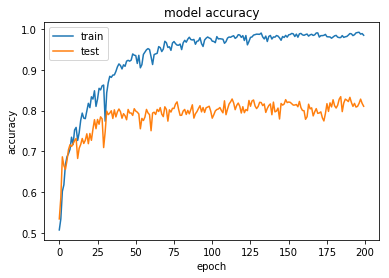

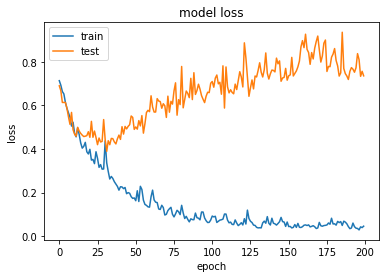

In [16]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model = Sequential()
model.add(Dropout(0.3))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=False,kernel_regularizer=regularizers.l2(0.0002)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=True,kernel_regularizer=regularizers.l2(0.0003)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history2=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 3s 2ms/step - loss: 0.7158 - acc: 0.5040 - val_loss: 0.6953 - val_acc: 0.5236

Epoch 00001: val_acc improved from -inf to 0.52362, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 3s 2ms/step - loss: 0.7004 - acc: 0.5218 - val_loss: 0.6810 - val_acc: 0.5576

Epoch 00002: val_acc improved from 0.52362 to 0.55765, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.6815 - acc: 0.5594 - val_loss: 0.6482 - val_acc: 0.6330

Epoch 00003: val_acc improved from 0.55765 to 0.63303, saving model to waveletsweights.best.hdf5
Epoch 4/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.6490 - acc: 0.6329 - val_loss: 0.6685 - val_acc: 0.6546

Epoch 00004: val_acc improved from 0.63303 to 0.65465, saving model to waveletsweights.best.hdf5
Epoch 5/200
2044/2044 [=

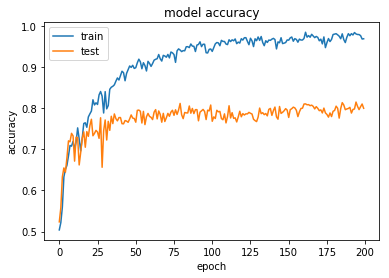

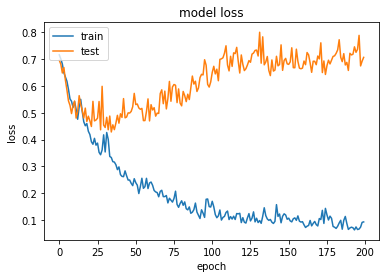

In [18]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=True,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=True,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(128,return_sequences=False,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history3=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 10s 5ms/step - loss: 0.9456 - acc: 0.5634 - val_loss: 0.8253 - val_acc: 0.6626

Epoch 00001: val_acc improved from -inf to 0.66258, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 9s 4ms/step - loss: 0.7632 - acc: 0.6834 - val_loss: 0.6808 - val_acc: 0.7160

Epoch 00002: val_acc improved from 0.66258 to 0.71605, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 9s 4ms/step - loss: 0.6455 - acc: 0.7151 - val_loss: 0.6248 - val_acc: 0.6964

Epoch 00003: val_acc did not improve from 0.71605
Epoch 4/200
2044/2044 [==============================] - 9s 4ms/step - loss: 0.6326 - acc: 0.7018 - val_loss: 0.6290 - val_acc: 0.6804

Epoch 00004: val_acc did not improve from 0.71605
Epoch 5/200
2044/2044 [==============================] - 9s 4ms/step - loss: 0.6889 - acc: 0.6706 - val_loss: 0.7832 

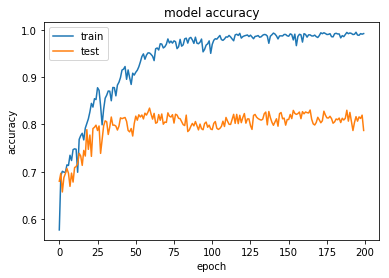

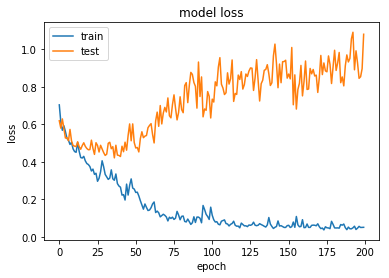

In [26]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=False,activity_regularizer=regularizers.l2(0.0001),kernel_regularizer=regularizers.l2(0.0002)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=True,kernel_regularizer=regularizers.l2(0.0003)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history2=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 3s 2ms/step - loss: 0.7832 - acc: 0.5067 - val_loss: 0.7453 - val_acc: 0.5248

Epoch 00001: val_acc improved from -inf to 0.52484, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 2s 1ms/step - loss: 0.7388 - acc: 0.5266 - val_loss: 0.7159 - val_acc: 0.5616

Epoch 00002: val_acc improved from 0.52484 to 0.56163, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 2s 1ms/step - loss: 0.7124 - acc: 0.5608 - val_loss: 0.6919 - val_acc: 0.6030

Epoch 00003: val_acc improved from 0.56163 to 0.60301, saving model to waveletsweights.best.hdf5
Epoch 4/200
2044/2044 [==============================] - 2s 1ms/step - loss: 0.6880 - acc: 0.6086 - val_loss: 0.6598 - val_acc: 0.6587

Epoch 00004: val_acc improved from 0.60301 to 0.65869, saving model to waveletsweights.best.hdf5
Epoch 5/200
2044/2044 [=

In [30]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=True,activity_regularizer=regularizers.l2(0.0001),kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(128, input_shape=(128, 8), return_sequences=True,activity_regularizer=regularizers.l2(0.0001),kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(128,return_sequences=False,activity_regularizer=regularizers.l2(0.0001),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history6=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 11s 5ms/step - loss: 9.6771 - acc: 0.5094 - val_loss: 5.2466 - val_acc: 0.5448

Epoch 00001: val_acc improved from -inf to 0.54480, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 9s 5ms/step - loss: 3.9479 - acc: 0.5790 - val_loss: 2.3356 - val_acc: 0.5827

Epoch 00002: val_acc improved from 0.54480 to 0.58266, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 9s 4ms/step - loss: 1.9622 - acc: 0.5251 - val_loss: 1.2210 - val_acc: 0.5369

Epoch 00003: val_acc did not improve from 0.58266
Epoch 4/200
2044/2044 [==============================] - 9s 5ms/step - loss: 1.0889 - acc: 0.5465 - val_loss: 0.8975 - val_acc: 0.5461

Epoch 00004: val_acc did not improve from 0.58266
Epoch 5/200
2044/2044 [==============================] - 9s 5ms/step - loss: 0.8728 - acc: 0.5230 - val_loss: 0.8414 

In [33]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,Y,test_size=0.2394, random_state=4)

In [34]:
model = Sequential()
batch_size=1
#model.add(Dropout(0.3))

model.add(LSTM(128, batch_input_shape=(1,128,8),kernel_regularizer=regularizers.l1(0.0001), stateful=True,return_sequences=False))
model.add(Dropout(0.6))
#model.add(LSTM(128))
model.add(Dense(128, activation='sigmoid'))

#model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#checkpointer = ModelCheckpoint(filepath="model.h5",monitor='val_loss',verbose=0,save_best_only=True)
filepath="weights4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [35]:
for i in range(1):
    history7=model.fit(x_train1, y_train1,batch_size=1,callbacks=callbacks_list,verbose=2,epochs=150,shuffle=False,validation_data=(x_test1, y_test1))

Train on 1944 samples, validate on 612 samples
Epoch 1/150
 - 52s - loss: 0.6781 - acc: 0.5944 - val_loss: 0.6008 - val_acc: 0.6519

Epoch 00001: val_acc improved from -inf to 0.65191, saving model to weights4.best.hdf5
Epoch 2/150
 - 51s - loss: 0.5926 - acc: 0.6665 - val_loss: 0.5553 - val_acc: 0.6667

Epoch 00002: val_acc improved from 0.65191 to 0.66665, saving model to weights4.best.hdf5
Epoch 3/150
 - 51s - loss: 0.5400 - acc: 0.6979 - val_loss: 0.5445 - val_acc: 0.6701

Epoch 00003: val_acc improved from 0.66665 to 0.67014, saving model to weights4.best.hdf5
Epoch 4/150
 - 51s - loss: 0.5371 - acc: 0.7034 - val_loss: 0.5380 - val_acc: 0.6694

Epoch 00004: val_acc did not improve from 0.67014
Epoch 5/150
 - 51s - loss: 0.5033 - acc: 0.7214 - val_loss: 0.5388 - val_acc: 0.6649

Epoch 00005: val_acc did not improve from 0.67014
Epoch 6/150
 - 51s - loss: 0.4830 - acc: 0.7354 - val_loss: 0.5148 - val_acc: 0.7062

Epoch 00006: val_acc improved from 0.67014 to 0.70623, saving model to